In [1]:
import openpyxl
import numpy as np
from functions import *
import matplotlib.pyplot as plt
from DE import DifferentialEvolution
from PSO import ParticleSwarmOptimization
from visualizer import create_folders, Visualizer

create_folders()

In [2]:
workbook = openpyxl.load_workbook('DataRegression.xlsx')
values = {'Var01': [[], []], 'Var11': [[], []], 'Var16': [[], []]}

for sheet_name in values.keys():
    sheet = workbook[sheet_name]

    for row in sheet.iter_rows(values_only=True):
        y, x = row
        if x != 'x' or y != 'y':
            values[f'{sheet_name}'][0].append(x)
            values[f'{sheet_name}'][1].append(y)

for key, value in values.items():
    print(key, value)

Var01 [[77.6, 114.9, 141.1, 190.8, 239.9, 289, 332.8, 378.4, 434.8, 477.3, 536.8, 593.1, 689.1, 760], [10.07, 14.73, 17.94, 23.93, 29.61, 35.18, 40.02, 44.82, 50.76, 55.05, 61.01, 66.4, 75.47, 81.78]]
Var11 [[77.6, 114.9, 141.1, 190.8, 239.9, 289, 332.8, 378.4, 434.8, 477.3, 536.8, 593.1, 689.1, 760], [10.07, 14.73, 17.94, 23.93, 29.61, 35.18, 40.02, 44.82, 50.76, 55.05, 61.01, 66.4, 75.47, 81.78]]
Var16 [[400, 405, 410, 415, 420, 425, 430, 435, 436.5, 438, 439.5, 441, 442.5, 444, 445.5, 447, 448.5, 450, 451.5, 453, 454.5, 456, 457.5, 459, 460.5, 462, 463.5, 465, 470, 475, 480, 485, 490, 495, 500], [0.0001575, 0.0001699, 0.000235, 0.0003102, 0.0004917, 0.000871, 0.0017418, 0.00464, 0.0065895, 0.0097302, 0.0149002, 0.023731, 0.0401683, 0.0712559, 0.1264458, 0.2073413, 0.2902366, 0.3445623, 0.3698049, 0.3668534, 0.3106727, 0.2078154, 0.1164354, 0.0616764, 0.03372, 0.0194023, 0.0117831, 0.0074357, 0.0022732, 0.00088, 0.0004579, 0.0002345, 0.0001586, 0.0001143, 7.1e-05]]


### Метод диференціальної еволюції

Best b1 & b2: [1.00000000e+02 1.70090099e-03]
Best fitness: 16.06040928184843


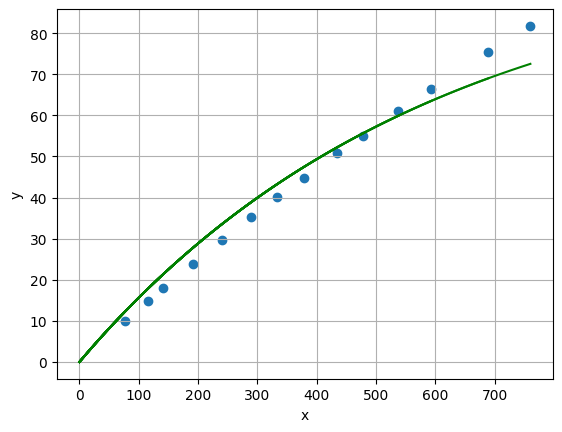

In [27]:
bounds = [(0, 100), (0, 1)]

de = DifferentialEvolution(Var01, bounds, values['Var01'])
best_params, best_fitness = de.optimize()

print('Best b1 & b2:', best_params)
print('Best fitness:', best_fitness)

v = Visualizer(algorithm='DE', file_name='Var01', data=de.param) 
v.plot_fitness()

b1, b2 = best_params[0], best_params[1]
x = np.linspace(0, values['Var01'][0], 50)
y = Var01(x, b1, b2)
plt.scatter(values['Var01'][0], values['Var01'][1])
plt.plot(x, y, color='green')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

Best b1 & b2: [1000.    1.]
Best fitness: 2150.949293262208


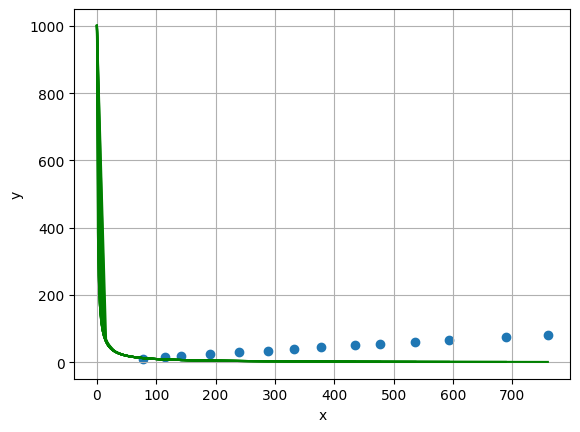

In [35]:
bounds = [(100, 1000), (0, 1)]

de = DifferentialEvolution(Var11, bounds, values['Var11'])
best_params, best_fitness = de.optimize()

print('Best b1 & b2:', best_params)
print('Best fitness:', best_fitness)

v = Visualizer(algorithm='DE', file_name='Var11', data=de.param) 
v.plot_fitness()

b1, b2 = best_params[0], best_params[1]
x = np.linspace(0, values['Var11'][0], 50)
y = Var11(x, b1, b2)
plt.scatter(values['Var11'][0], values['Var11'][1])
plt.plot(x, y, color='green')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

Best b1 & b2: [  1.55434589   4.08861575 451.54121612]
Best fitness: 4.1816848789117084e-05


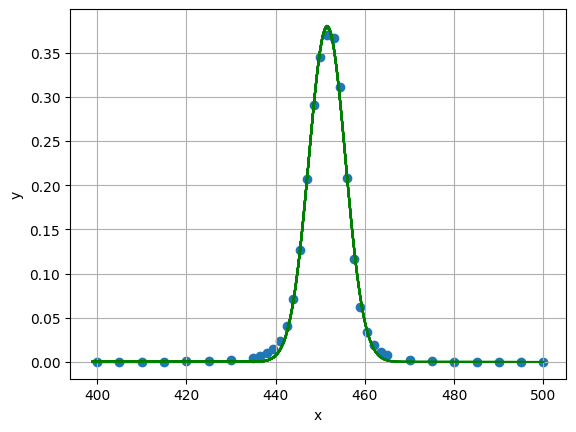

In [44]:
bounds = [(1, 10), (1, 10), (100, 1000)]

de = DifferentialEvolution(Var16, bounds, values['Var16'], pop_size=300, tol=1e-9)
best_params, best_fitness = de.optimize()

print('Best b1 & b2:', best_params)
print('Best fitness:', best_fitness)

v = Visualizer(algorithm='DE', file_name='Var16', data=de.param) 
v.plot_fitness()

b1, b2, b3 = best_params[0], best_params[1], best_params[2]
x = np.linspace(399, values['Var16'][0], 100)
y = Var16(x, b1, b2, b3)
plt.scatter(values['Var16'][0], values['Var16'][1])
plt.plot(x, y, color='green')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

### Алгоритм оптимізації роєм частинок

Best b1 & b2: [1.00000000e+02 1.69394143e-03]
Best fitness: 16.076542497637995


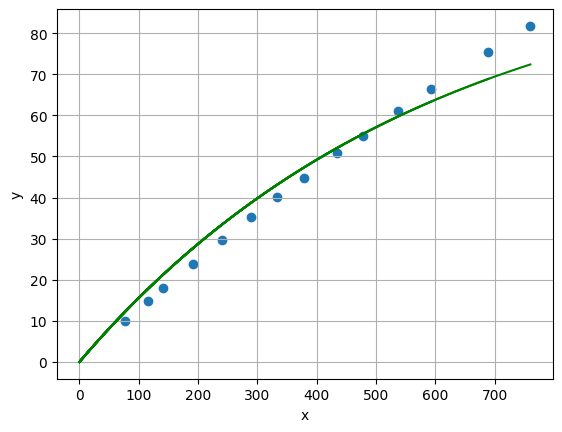

In [22]:
bounds = [(0, 100), (0, 1)]

pso = ParticleSwarmOptimization(Var01, bounds, values['Var01'])
best_params, best_fitness = pso.optimize()

print('Best b1 & b2:', best_params)
print('Best fitness:', best_fitness)

v = Visualizer(algorithm='PSO', file_name='Var01', data=pso.param) 
v.plot_fitness()
b1, b2 = best_params[0], best_params[1]
x = np.linspace(0, values['Var01'][0], 50)
y = Var01(x, b1, b2)
plt.scatter(values['Var01'][0], values['Var01'][1])
plt.plot(x, y, color='green')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

Best b1 & b2: [1000.    1.]
Best fitness: 2150.949293262208


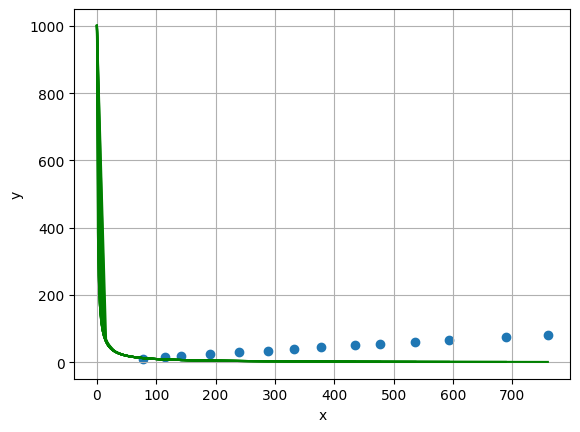

In [38]:
bounds = [(100, 1000), (0, 1)]

pso = ParticleSwarmOptimization(Var11, bounds, values['Var11'], num_particles=100, tol=1e-9)
best_params, best_fitness = pso.optimize()

print('Best b1 & b2:', best_params)
print('Best fitness:', best_fitness)

v = Visualizer(algorithm='PSO', file_name='Var11', data=pso.param) 
v.plot_fitness()

b1, b2 = best_params[0], best_params[1]
x = np.linspace(0, values['Var11'][0], 50)
y = Var11(x, b1, b2)
plt.scatter(values['Var11'][0], values['Var11'][1])
plt.plot(x, y, color='green')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

Best b1 & b2: [  1.76580077   4.45514496 450.96050229]
Best fitness: 0.00046351421540520517


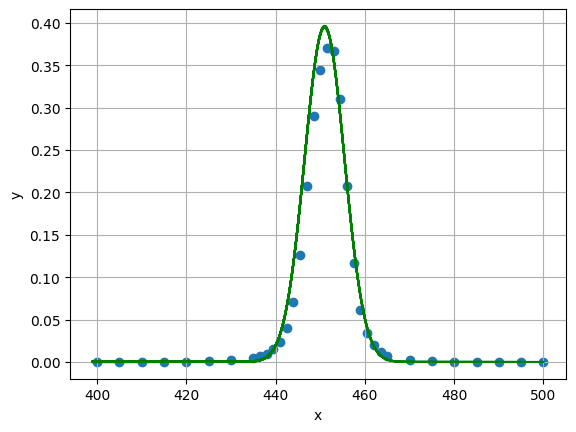

In [43]:
bounds = [(1, 10), (1, 10), (100, 1000)]

pso = ParticleSwarmOptimization(Var16, bounds, values['Var16'])
best_params, best_fitness = pso.optimize()

print('Best b1 & b2:', best_params)
print('Best fitness:', best_fitness)

v = Visualizer(algorithm='PSO', file_name='Var16', data=pso.param) 
v.plot_fitness()

b1, b2, b3 = best_params[0], best_params[1], best_params[2]
x = np.linspace(399, values['Var16'][0], 100)
y = Var16(x, b1, b2, b3)
plt.scatter(values['Var16'][0], values['Var16'][1])
plt.plot(x, y, color='green')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()